In [22]:
# Upload THE DATASET zip file
from google.colab import files
rc = list(files.upload().values())[0]

Saving bsd200.zip to bsd200.zip


In [21]:
!ls

sample_data


In [23]:
#UNZIP THE DATA SET
!unzip bsd200.zip

Archive:  bsd200.zip
   creating: bsd200/
  inflating: bsd200/28096.png        
  inflating: bsd200/28075.png        
  inflating: bsd200/277095.png       
  inflating: bsd200/274007.png       
  inflating: bsd200/271031.png       
  inflating: bsd200/271008.png       
  inflating: bsd200/27059.png        
  inflating: bsd200/268002.png       
  inflating: bsd200/26031.png        
  inflating: bsd200/260081.png       
  inflating: bsd200/254054.png       
  inflating: bsd200/254033.png       
  inflating: bsd200/253036.png       
  inflating: bsd200/25098.png        
  inflating: bsd200/249087.png       
  inflating: bsd200/249061.png       
  inflating: bsd200/247085.png       
  inflating: bsd200/246053.png       
  inflating: bsd200/246016.png       
  inflating: bsd200/245051.png       
  inflating: bsd200/242078.png       
  inflating: bsd200/24063.png        
  inflating: bsd200/24004.png        
  inflating: bsd200/239096.png       
  inflating: bsd200/239007.png       
  inflat

In [34]:
from google.colab import files
rc = list(files.upload().values())[0]

Saving baby_GT.bmp to baby_GT.bmp
Saving bird_GT.bmp to bird_GT.bmp
Saving butterfly_GT.bmp to butterfly_GT.bmp
Saving head_GT.bmp to head_GT.bmp
Saving woman_GT.bmp to woman_GT.bmp


In [0]:
# Upload THE TEST IMAGE FILE
#from google.colab import files
#rc = list(files.upload().values())[0]

In [24]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Activation
import keras.backend as K
from keras import optimizers
import numpy as np
import h5py
from keras.layers import Input,Dense,Convolution2D,Activation,MaxPooling2D,Flatten,merge
from keras.layers.merge import add
from keras.models import Model, load_model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.layers.convolutional import Deconv2D as Conv2DTranspose


import keras.backend as K
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Activation, Input
from keras import optimizers
from keras.models import load_model
import numpy as np
import scipy.misc
import scipy.ndimage
import cv2
import math
import glob
import matplotlib.pyplot as plt
import keras

Using TensorFlow backend.


In [25]:
img_shape = (32,32,1)
input_img = Input(shape=(img_shape),name='INPUT_IMAGE')

C1 = Conv2D(64,(3,3),padding='SAME',name='C1_CONVOLUTION_LAYER')(input_img)
A1 = Activation('relu', name='A1_ACTIVATION_LAYER')(C1)
Z1 = keras.layers.add([input_img,A1],name='Z1_INDENTITY_BLOCK')

C2 = Conv2D(64,(3,3),padding='SAME',name='C2_CONVOLUTION_LAYER')(Z1)
A2 = Activation('relu', name='A2_ACTIVATION_LAYER')(C2)
Z2 = keras.layers.add([input_img,A2,Z1],name='Z2_INDENTITY_BLOCK')

C3 = Conv2D(64,(3,3),padding='SAME',name='C3_CONVOLUTION_LAYER')(Z2)
A3 = Activation('relu', name='A3_ACTIVATION_LAYER')(C3)
Z3 = keras.layers.add([input_img,A3,Z1,Z2],name='Z3_INDENTITY_BLOCK')



#Concatenate1 = keras.layers.concatenate([C1,C2,C3,C4], axis = 3)
#BRANCH A
A= Conv2D(16, (3,3), padding='same', activation='relu',name='BRANCH_A_1X1_CONV')(Z3)
#BRANCH B
B = Conv2D(16, (5,5), padding='same', activation='relu',name='BRANCH_B_1X1_CONV')(Z3)
#BRANCH C
C = Conv2D(16, (7,7), padding='same', activation='relu',name='BRANCH_C_1X1_CONV')(Z3)
# concatenation
Filter_Concatenate = keras.layers.concatenate([A, B, C], axis = 3)
# add dense layers
D = Conv2D(16, (3,3), padding='same', activation='relu',name='BARNCH_C_5X5_CONVD')(Filter_Concatenate)
E = Conv2D(16, (5,5), padding='same', activation='relu',name='BARNCH_C_5X5_CONVE')(D)
F = Conv2D(16, (7,7), padding='same', activation='relu',name='BARNCH_C_5X5_CONVF')(E)
#BRANCH D
G= Conv2D(16, (3,3), padding='same', activation='relu')(F)
#BRANCH E
H= Conv2D(16, (5,5), padding='same', activation='relu')(F)
#BRANCH F
I= Conv2D(16, (7,7), padding='same', activation='relu')(F)
Filter_Concatenate1 = keras.layers.concatenate([G,H,I], axis = 3)

Cl = Conv2D(1,(5,5),padding='SAME',name='CONVl')(Filter_Concatenate1)
Al = Activation('relu', name='actl')(Cl)
model = Model(input_img, Al)
opt = optimizers.Adam(lr=0.0003)
model.compile(optimizer=opt,loss='mean_squared_error')
model.summary()


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
INPUT_IMAGE (InputLayer)        (None, 32, 32, 1)    0                                            
__________________________________________________________________________________________________
C1_CONVOLUTION_LAYER (Conv2D)   (None, 32, 32, 64)   640         INPUT_IMAGE[0][0]                
__________________________________________________________________________________________________
A1_ACTIVATION_LAYER (Activation (None, 32, 32, 64)   0           C1_CONVOLUTION_LAYER[0][0]       
__________________________________________________________________________________________________
Z1_INDENTITY_BLOCK (Add)        (None, 32, 32, 64)   0           INPUT_IMAGE[0][0]                
                                                                 A1_ACTIVATION_LAYER[0][0]        
__________

In [0]:
#SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [0]:
def modcrop(image, scale=2): #BY DEFAULT SCALE 2###############################################################
  if len(image.shape) == 3:
    h, w, _ = image.shape
    h = h - np.mod(h, scale)
    w = w - np.mod(w, scale)
    image = image[0:h, 0:w, :]
  else:
      h, w = image.shape
      h = h - np.mod(h, scale)
      w = w - np.mod(w, scale)
      image = image[0:h, 0:w]
      return image

In [0]:
def create_LR(image,scale):
  label_ = modcrop(image, scale)
   # Must be normalized
  label_ = label_ / 255.
  input_ = scipy.ndimage.interpolation.zoom(label_, (1./scale), prefilter=False)
  input_ = scipy.ndimage.interpolation.zoom(input_, (scale/1.), prefilter=False)
  return input_

In [0]:
path = 'bsd200/'
files_y = glob.glob(path + '*.png')
trainfiles = files_y[:85]             #HERE TOTAL IMAGES ARE 91 , SO FROM 91 up to 85 used for Training
valfiles = files_y[85:]               #HERE Above 85 used for Validation Set
img_size = 32
stride = 16 #change stride from 16 to 2
X_train = []
Y_train = []
X_val = []
Y_val = []

In [0]:
# Extract patch image for training
for file_y in trainfiles:
  tmp_y = scipy.misc.imread(file_y,flatten=True, mode='YCbCr').astype(np.float)
  tmp_X = create_LR(tmp_y,2)##########################################################################################################
  h,w = tmp_y.shape
  for x in range(0, h-img_size+1, stride):
    for y in range(0, w-img_size+1, stride):
      sub_input = tmp_X[x:x+img_size,            y:y+img_size].reshape(img_size,img_size,1)
      sub_label = tmp_y[x:x+img_size, y:y+img_size].reshape(img_size,img_size,1)
      X_train.append(sub_input)
      Y_train.append(sub_label)

In [0]:
# Extract patch image for validation
for file_y in valfiles:
  tmp_y = scipy.misc.imread(file_y,flatten=True, mode='YCbCr').astype(np.float)
  tmp_X = create_LR(tmp_y,2)###################################################################################################
  h,w = tmp_y.shape
  for x in range(0, h-img_size+1, stride):
    for y in range(0, w-img_size+1, stride):
      sub_input = tmp_X[x:x+img_size,  y:y+img_size].reshape(img_size,img_size,1) # [32 x 32]
      sub_label = tmp_y[x:x+img_size, y:y+img_size].reshape(img_size,img_size,1) # [32 x 32]
      X_val.append(sub_input)
      Y_val.append(sub_label)

In [0]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_val = np.array(X_val)
Y_val = np.array(Y_val)

In [0]:
model.fit(X_train, Y_train, batch_size =32, epochs = 100, validation_data=(X_val, Y_val))
model.save('wscale2.h5')

Train on 46835 samples, validate on 63365 samples
Epoch 1/100
46835/46835 [==============================] - 134s 3ms/step - loss: 89.9385 - val_loss: 98.5819
Epoch 2/100
46835/46835 [==============================] - 130s 3ms/step - loss: 89.7893 - val_loss: 98.9237
Epoch 3/100
46835/46835 [==============================] - 128s 3ms/step - loss: 89.7389 - val_loss: 99.7980
Epoch 4/100
46835/46835 [==============================] - 128s 3ms/step - loss: 89.7327 - val_loss: 99.2614
Epoch 5/100
46835/46835 [==============================] - 132s 3ms/step - loss: 89.8420 - val_loss: 98.5582
Epoch 6/100
46835/46835 [==============================] - 136s 3ms/step - loss: 89.5195 - val_loss: 98.3740
Epoch 7/100
46835/46835 [==============================] - 136s 3ms/step - loss: 89.5615 - val_loss: 99.6141
Epoch 8/100
46835/46835 [==============================] - 136s 3ms/step - loss: 89.2996 - val_loss: 98.6648
Epoch 9/100
46835/46835 [==============================] - 134s 3ms/step - los

In [48]:
img_o = scipy.misc.imread('baby_GT.bmp',flatten=True,mode='YCbCr').astype(np.float)
#img_o = scipy.misc.imread('yang91/t53.bmp',flatten=True,mode='YCbCr').astype(np.float)
img = create_LR(img_o,2)##########################################################################################################################
img_size = 32
stride = 16
h,w = img.shape
piece_wise = []
for x in range(0, h-img_size+1, stride):
  for y in range (0, w-img_size+1, stride):
    sub_input = img[x:x+img_size, y:y+img_size].reshape(img_size,img_size,1)
    piece_wise.append(sub_input)
input_ = np.asarray(piece_wise)
srcnn = load_model('wscale2.h5')
hat = srcnn.predict(input_)
img_re = np.zeros(img.shape)
i = 0
for x in range(0, h-img_size+1, stride):
  for y in range (0, w-img_size+1, stride):
    img_re[x:x+img_size, y:y+img_size] = hat[i].reshape(img_size,img_size)
    i += 1
cv2.imwrite('restored1.bmp', img_re)
cv2.imwrite('HR1.bmp', img_o)
img_save = (img*255).astype(np.uint8)
cv2.imwrite('lowresolution.bmp',img_save)

True

In [49]:
#CALCULATE PSNR
original = cv2.imread("HR1.bmp")
lowresolution = cv2.imread("lowresolution.bmp",1)
contrast = cv2.imread("restored1.bmp",1)
def psnr(img1, img2):
  mse = np.mean((img1-img2)**2)
  if mse ==0:
        return 100
  PIXEL_MAX = 255.0
  return 20* math.log10(PIXEL_MAX / math.sqrt(mse))
d = psnr(original,contrast)
print(d)

37.33258719657986


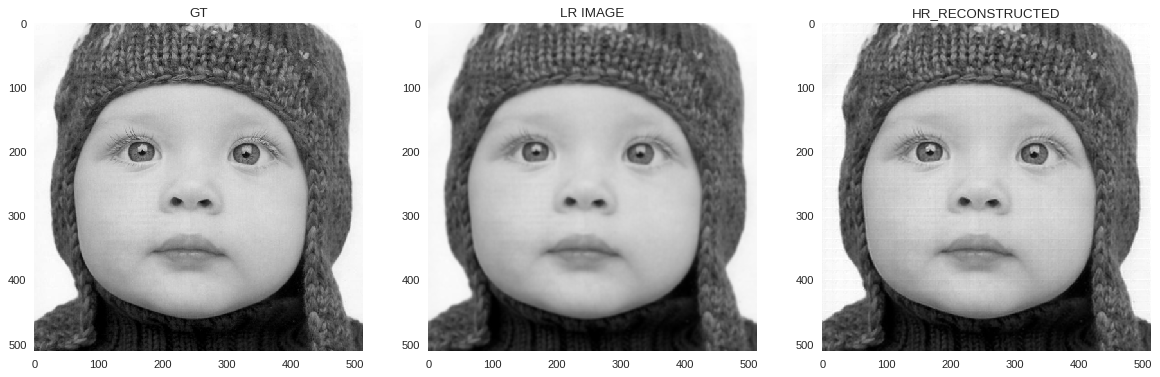

In [37]:
fig = plt.figure(figsize = (18,18), dpi = 80)
ax = plt.subplot("131")
ax.imshow(original)
ax.set_title("GT")
plt.grid(0)

ax = plt.subplot("132")
ax.imshow(lowresolution)
ax.set_title("LR IMAGE")
plt.grid(0)



ax = plt.subplot("133")
ax.imshow(contrast)
ax.set_title("HR_RECONSTRUCTED")
plt.grid(0)
plt.show()


In [0]:
from google.colab import files
files.download('wscale2.h5')

In [0]:
#!rm -f wscale2.h5

In [58]:
!ls

baby_GT.png  butterfly_GT.bmp  head_GT.png  woman_GT.png  yang91.zip
bird_GT.png  butterfly_GT.png  sample_data  yang91


In [0]:
!rm -f HR1.bmp